In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('D:\Machine learning\iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.drop(['Id', 'Species'], axis=1, inplace=True)


In [15]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


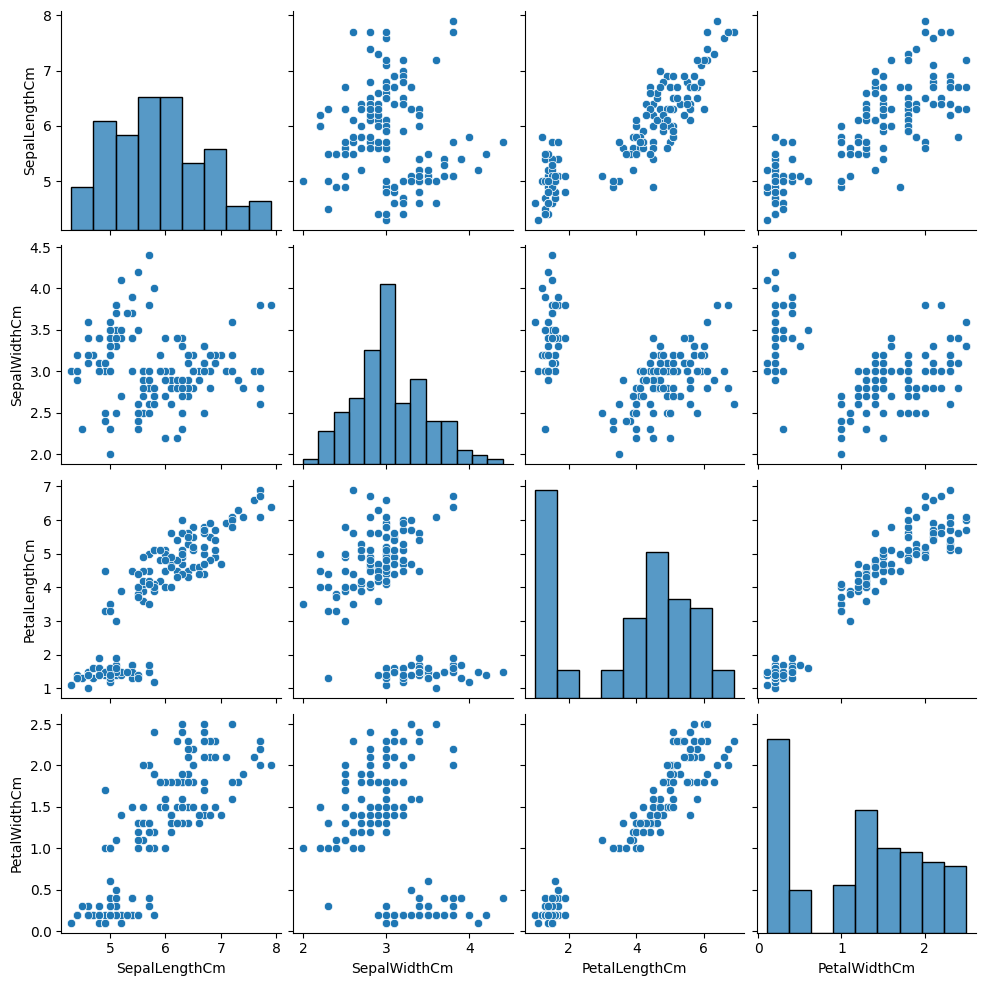

In [16]:
sns.pairplot( data=df)
plt.show()


In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [19]:
wcss = []


for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(df)
    wcss.append(km.inertia_)

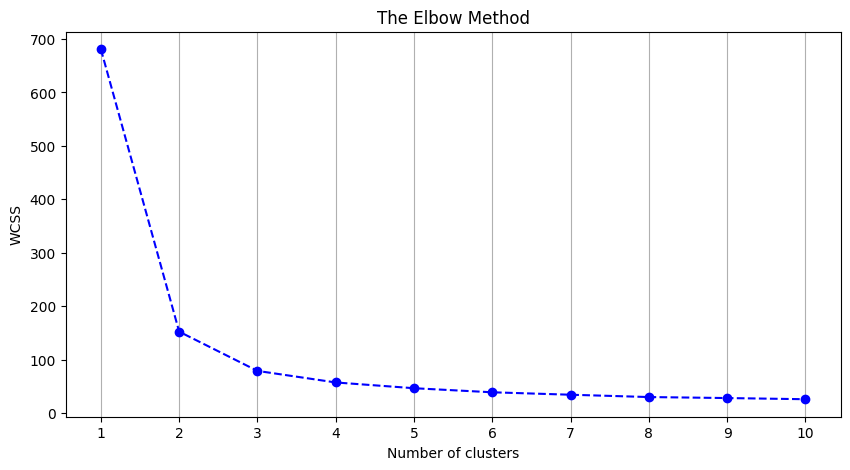

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(list(range(1, 11)), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of clusters')
plt.xticks(list(range(1, 11)))
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.grid(axis='x')
plt.show()


In [46]:
from sklearn.metrics import silhouette_score

In [34]:
km = KMeans(n_clusters=3)
df ['Predict'] = km.fit_predict(df)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [47]:
km.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [48]:
silhouette_score(df,labels=km.labels_)

0.6218780254335335

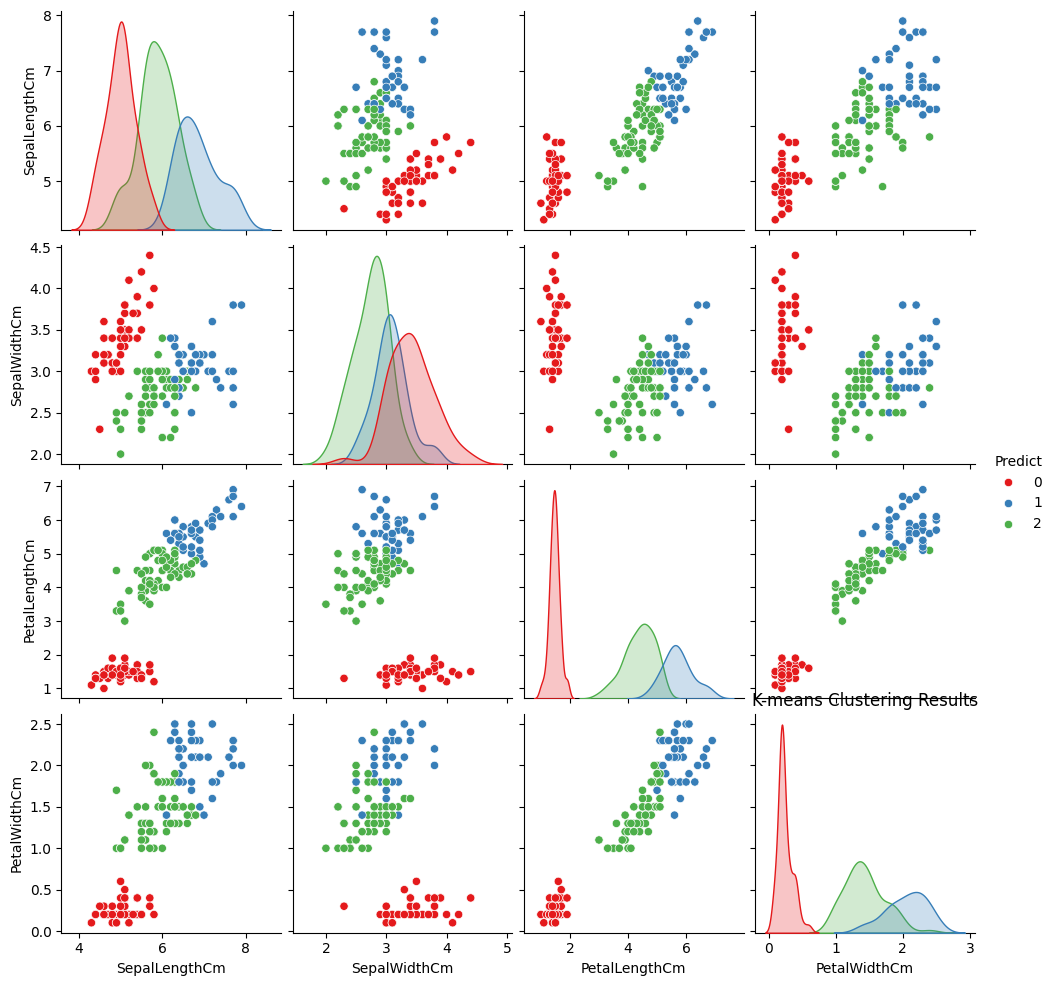

In [44]:
sns.pairplot(data=df, hue='Predict', palette='Set1')
plt.savefig('Prediction.jpg', dpi=300)
plt.title('K-means Clustering Results')
plt.show()

In [42]:
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


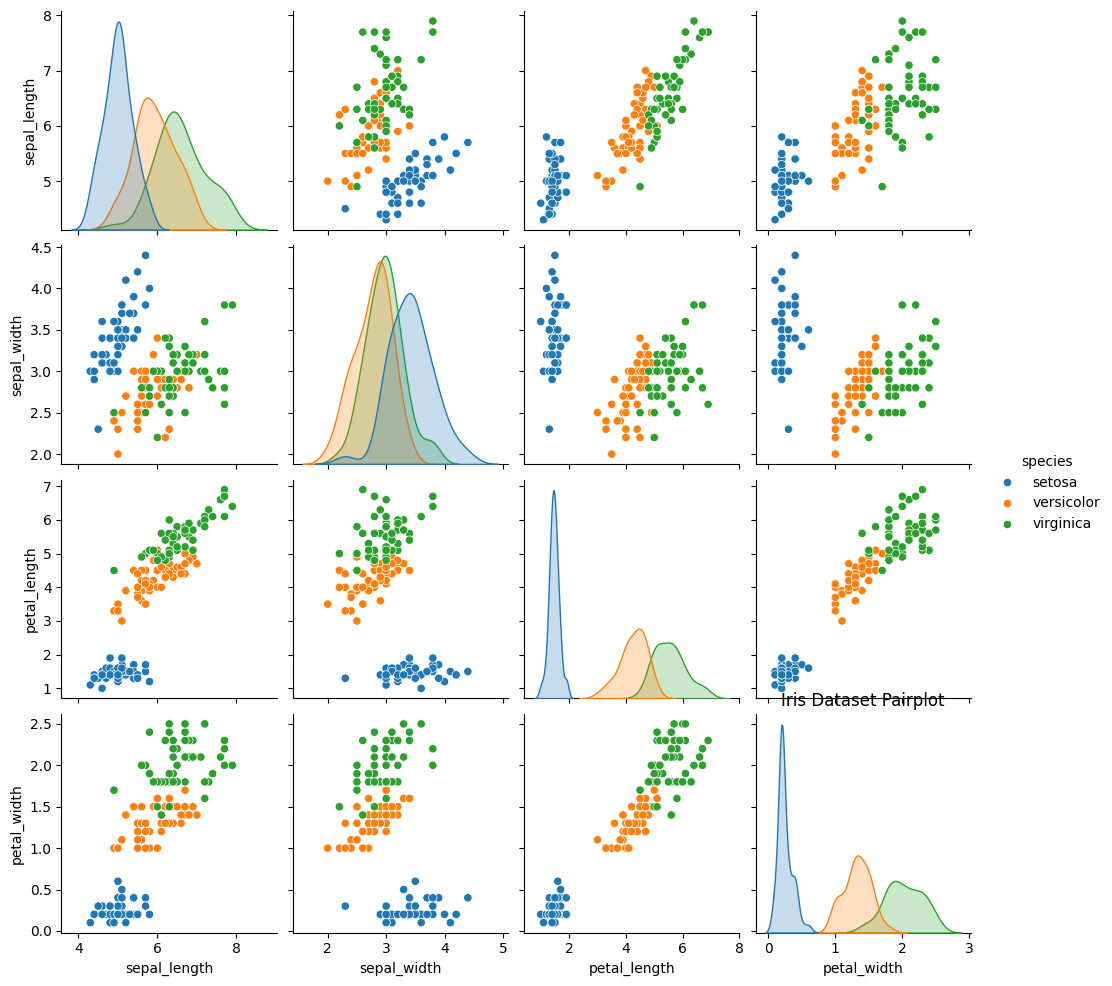

In [45]:
sns.pairplot(data=iris, hue='species')
plt.savefig('org.jpg', dpi=300)
plt.title('Iris Dataset Pairplot')
plt.show()

In [51]:
ss = []
no_c = [j for j in range(2, 21)]
for i in range(2, 21):
    km1 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km1.fit(iris.drop('species', axis=1))
    print(f'For {i} clusters, the silhouette score is: {ss.append(silhouette_score(iris.drop("species", axis=1), labels=km.labels_))}')

For 2 clusters, the silhouette score is: None
For 3 clusters, the silhouette score is: None
For 4 clusters, the silhouette score is: None
For 5 clusters, the silhouette score is: None
For 6 clusters, the silhouette score is: None
For 7 clusters, the silhouette score is: None
For 8 clusters, the silhouette score is: None
For 9 clusters, the silhouette score is: None
For 10 clusters, the silhouette score is: None
For 11 clusters, the silhouette score is: None
For 12 clusters, the silhouette score is: None
For 13 clusters, the silhouette score is: None
For 14 clusters, the silhouette score is: None
For 15 clusters, the silhouette score is: None
For 16 clusters, the silhouette score is: None
For 17 clusters, the silhouette score is: None
For 18 clusters, the silhouette score is: None
For 19 clusters, the silhouette score is: None
For 20 clusters, the silhouette score is: None


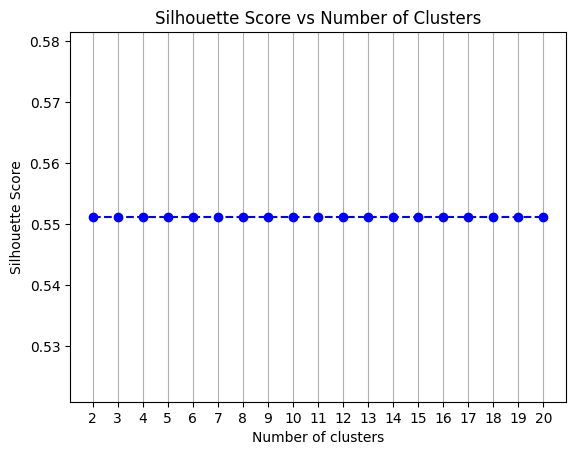

In [52]:
plt.plot(no_c, ss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of clusters')
plt.xticks(no_c)
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(axis='x')
plt.savefig('Silhouette_Score.jpg', dpi=300)
plt.show()